# Importing Libraries

In [1]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# Dataset

In [2]:
# Download Dataset

# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR

# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:01<00:00, 80.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 45.3MB/s]


In [3]:
TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

In [4]:
with open(TRAINING_FILE) as training_file:
    line = training_file.readline()
    print(f"First line (header) looks like this:\n{line}")
    line = training_file.readline()
    print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

## Parsing the dataset


In [5]:
def parse_data(filename):
    with open(filename) as file:

        csv_reader = csv.reader(file, delimiter=',')

        labels = []
        images = []

        # Skip header
        next(csv_reader, None)

        for row in csv_reader:
            label = row[0]
            image = row[1:]
            image = np.reshape(image, (28, 28))

            labels.append(label)
            images.append(image)
        
        labels = np.array(labels).astype('float')
        images = np.array(images).astype('float')
    return images, labels

In [6]:
training_images, training_labels = parse_data(TRAINING_FILE)
validation_images, validation_labels = parse_data(VALIDATION_FILE)

print(f"Training images has shape:   {training_images.shape}")
print(f"Training labels has shape:   {training_labels.shape}")
print(f"Validation images has shape: {validation_images.shape}")
print(f"Validation labels has shape: {validation_labels.shape}")

Training images has shape:   (27455, 28, 28)
Training labels has shape:   (27455,)
Validation images has shape: (7172, 28, 28)
Validation labels has shape: (7172,)


## Plot some samples

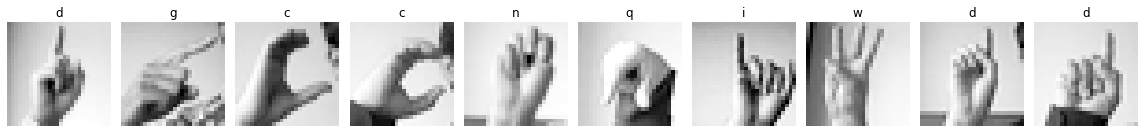

In [7]:
fig, axes = plt.subplots(1, 10, figsize=(16, 15))

axes = axes.flatten()
letters = list(string.ascii_lowercase)

for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
 
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

plt.tight_layout()
plt.show()

# Create Generator

In [8]:
training_images = np.expand_dims(training_images, axis = -1)
validation_images = np.expand_dims(validation_images, axis = -1)


train_datagen = ImageDataGenerator(
    rescale = 1./255., 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = train_datagen.flow(x=training_images,
                                     y=training_labels,
                                     batch_size=32) 

  
validation_datagen = ImageDataGenerator(rescale = 1./255.)

validation_generator = validation_datagen.flow(x=validation_images,
                                               y=validation_labels,
                                               batch_size=32)

In [9]:
print(f"Images of training   generator have shape: {train_generator.x.shape}")
print(f"Labels of training   generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training   generator have shape: (27455, 28, 28, 1)
Labels of training   generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


# Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # 26 classes
    tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [11]:
# Compile
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Fitting
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 20s 13ms/step - loss: 2.6966 - accuracy: 0.1766 - val_loss: 1.6549 - val_accuracy: 0.4159
Epoch 2/15
858/858 [==============================] - 12s 14ms/step - loss: 1.7962 - accuracy: 0.4214 - val_loss: 0.9991 - val_accuracy: 0.6662
Epoch 3/15
858/858 [==============================] - 11s 13ms/step - loss: 1.3096 - accuracy: 0.5707 - val_loss: 0.7552 - val_accuracy: 0.7439
Epoch 4/15
858/858 [==============================] - 12s 14ms/step - loss: 1.0566 - accuracy: 0.6509 - val_loss: 0.6995 - val_accuracy: 0.7610
Epoch 5/15
858/858 [==============================] - 12s 14ms/step - loss: 0.9063 - accuracy: 0.7017 - val_loss: 0.5640 - val_accuracy: 0.7943
Epoch 6/15
858/858 [==============================] - 11s 13ms/step - loss: 0.7782 - accuracy: 0.7430 - val_loss: 0.4123 - val_accuracy: 0.8615
Epoch 7/15
858/858 [==============================] - 11s 13ms/step - loss: 0.6896 - accuracy: 0.7692 - val_loss: 0.3256 - val_accuracy:

# Plots

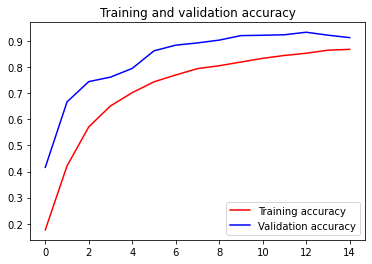

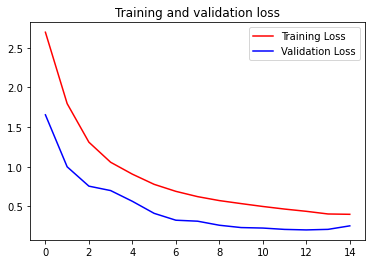

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()